In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.drop(["Id"],axis=1,inplace=True) 
data.drop(["Utilities"],axis=1,inplace=True) #we drop because all values are same

### Handling NaN values

In [6]:
var = data.isnull().sum()
print(var.to_string())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

<AxesSubplot:>

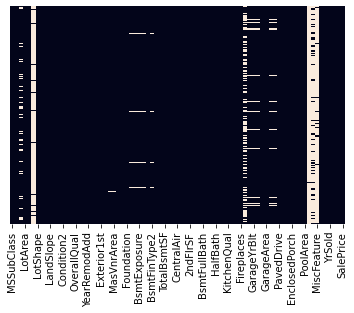

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [8]:
data.drop(["Alley"],axis=1,inplace=True)

In [9]:
data.drop(["FireplaceQu"],axis=1,inplace=True)

In [10]:
data.drop(["PoolQC"],axis=1,inplace=True)

In [11]:
data.drop(["MiscFeature"],axis=1,inplace=True)

In [12]:
data.drop(["Fence"],axis=1,inplace=True)

In [13]:
var = data.isnull().sum()
print(var.to_string())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

In [14]:
data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].mean())

In [15]:
data["BsmtQual"] = data["BsmtQual"].fillna(data["BsmtQual"].mode()[0])

In [16]:
data["BsmtCond"] = data["BsmtCond"].fillna(data["BsmtCond"].mode()[0])

In [17]:
data["BsmtExposure"] = data["BsmtExposure"].fillna(data["BsmtExposure"].mode()[0])

In [18]:
data["BsmtFinType1"] = data["BsmtFinType1"].fillna(data["BsmtFinType1"].mode()[0])

In [19]:
data["BsmtFinType2"] = data["BsmtFinType2"].fillna(data["BsmtFinType2"].mode()[0])

In [20]:
data["Electrical"] = data["Electrical"].fillna("SBrkr")

In [21]:
data["MasVnrType"] = data["MasVnrType"].fillna(data["MasVnrType"].mode()[0])

In [22]:
data["MasVnrArea"] = data["MasVnrArea"].fillna(data["MasVnrArea"].mean())

In [23]:
data["GarageType"] = data["GarageType"].fillna(data["GarageType"].mode()[0])

In [24]:
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean())

In [25]:
data["GarageFinish"] = data["GarageFinish"].fillna(data["GarageFinish"].mode()[0])

In [26]:
data["GarageQual"] = data["GarageQual"].fillna(data["GarageQual"].mode()[0])

In [27]:
data["MasVnrType"] = data["MasVnrType"].fillna(data["MasVnrType"].mode()[0])

In [28]:
data["GarageCond"] = data["GarageCond"].fillna(data["GarageCond"].mode()[0])

In [29]:
var = data.isnull().sum()
print(var.to_string())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

# Handling Test Data


In [30]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [32]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [33]:
test_id = test["Id"]
test.drop(["Id"],axis=1,inplace=True)
test.drop(["Utilities"],axis=1,inplace=True)

### Handling NaN values

In [34]:
var = test.isnull().sum()
print(var.to_string())

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

<AxesSubplot:>

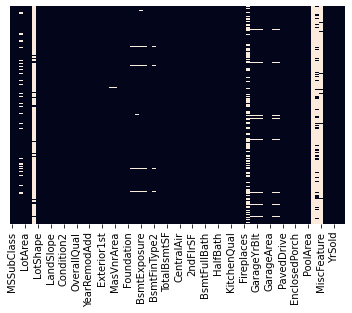

In [35]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [36]:
test.drop(["Alley"],axis=1,inplace=True)

In [37]:
test.drop(["FireplaceQu"],axis=1,inplace=True)

In [38]:
test.drop(["PoolQC"],axis=1,inplace=True)

In [39]:
test.drop(["MiscFeature"],axis=1,inplace=True)

In [40]:
test.drop(["Fence"],axis=1,inplace=True)

In [41]:
var = test.isnull().sum()
print(var.to_string())

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath     

In [42]:
test["MSZoning"] = test["MSZoning"].fillna(test["MSZoning"].mode()[0])

In [43]:
test["LotFrontage"] = test["LotFrontage"].fillna(test["LotFrontage"].mean())

In [44]:
test["Exterior1st"] = test["Exterior1st"].fillna(test["Exterior1st"].mode()[0])

In [45]:
test["Exterior2nd"] = test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0])

In [46]:
test["MasVnrType"] = test["MasVnrType"].fillna(test["MasVnrType"].mode()[0])

In [47]:
test["MasVnrArea"] = test["MasVnrArea"].fillna(test["MasVnrArea"].mean())

In [48]:
test["BsmtQual"] = test["BsmtQual"].fillna(test["BsmtQual"].mode()[0])

In [49]:
test["BsmtCond"] = test["BsmtCond"].fillna(test["BsmtCond"].mode()[0])

In [50]:
test["BsmtExposure"] = test["BsmtExposure"].fillna(test["BsmtExposure"].mode()[0])

In [51]:
test["BsmtFinType1"] = test["BsmtFinType1"].fillna(test["BsmtFinType1"].mode()[0])

In [52]:
test["BsmtFinType2"] = test["BsmtFinType2"].fillna(test["BsmtFinType2"].mode()[0])

In [53]:
test["BsmtFinSF1"] = test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mean())

In [54]:
test["BsmtFinSF2"] = test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mean())

In [55]:
test["BsmtUnfSF"] = test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mean())

In [56]:
test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean())

In [57]:
test["KitchenQual"] = test["KitchenQual"].fillna(test["KitchenQual"].mode()[0])

In [58]:
test["BsmtFullBath"] = test["BsmtFullBath"].fillna(test["BsmtFullBath"].mode()[0])

In [59]:
test["BsmtHalfBath"] = test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].mode()[0])

In [60]:
test["Functional"] = test["Functional"].fillna(test["Functional"].mode()[0])

In [61]:
test["GarageType"] = test["GarageType"].fillna(test["GarageType"].mode()[0])

In [62]:
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean())

In [63]:
test["GarageFinish"] = test["GarageFinish"].fillna(test["GarageFinish"].mode()[0])

In [64]:
test["GarageQual"] = test["GarageQual"].fillna(test["GarageQual"].mode()[0])

In [65]:
test["GarageCond"] = test["GarageCond"].fillna(test["GarageCond"].mode()[0])

In [66]:
test["GarageCars"] = test["GarageCars"].fillna(test["GarageCars"].mode()[0])

In [67]:
test["GarageArea"] = test["GarageArea"].fillna(test["GarageArea"].mean())

In [68]:
test["SaleType"] = test["SaleType"].fillna(test["SaleType"].mode()[0])

In [69]:
var = test.isnull().sum()
print(var.to_string)

<bound method Series.to_string of MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual     

# Encoding

In [70]:
y = data["SalePrice"]
data.drop(["SalePrice"],axis=1,inplace=True)

In [71]:
data.shape

(1460, 73)

In [72]:
test.shape

(1459, 73)

In [73]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [74]:
test.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [75]:
data["train"]=1
test["train"]=0

In [76]:
combined = pd.concat([data,test])

In [77]:
combined_num = []
combined_cat = []
for i in range(len(combined.columns)):
    if combined.dtypes[i] == "O":
        combined_cat.append(combined.columns[i])
    else:
        combined_num.append(combined.columns[i])

In [78]:
for i in combined_cat:
    dataframe = pd.get_dummies(combined[i],drop_first=True)
    combined.drop([i],axis=1,inplace=True)
    combined=pd.concat([combined,dataframe],axis=1)
    

In [79]:
combined.shape

(2919, 232)

In [80]:
data = combined[combined["train"]==1]
test = combined[combined["train"]==0]
data.drop(["train"],axis=1,inplace=True)
test.drop(["train"],axis=1,inplace=True)

In [81]:
data.shape

(1460, 231)

In [82]:
test.shape

(1459, 231)

In [83]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(data)
x_test = scaler.fit_transform(test)
y_train = y

In [85]:
x_train

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29411765, 0.15410959, 0.03618687, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.1609589 , 0.03934189, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.18493151, 0.04037019, ..., 0.        , 1.        ,
        0.        ]])

In [86]:
x_test

array([[0.        , 0.32960894, 0.18414656, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33519553, 0.23212407, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.29608939, 0.22419735, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.77653631, 0.33611464, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.22905028, 0.16272447, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.29608939, 0.14795937, ..., 0.        , 1.        ,
        0.        ]])

In [87]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Model Selection

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr,x_train,y_train)
cv

array([-1.75802870e+16, -8.79161373e+18, -2.50666312e+12, -1.07067314e+15,
       -1.12506532e+18])

In [90]:
from sklearn.linear_model import Ridge
rg = Ridge()
cv2 = cross_val_score(rg,x_train,y_train)
cv2

array([0.89574284, 0.82622029, 0.86156334, 0.86895504, 0.72076884])

In [91]:
from sklearn import linear_model
clf = linear_model.Lasso()
cv3 = cross_val_score(clf,x_train,y_train)
cv3

array([0.17684372, 0.82140215, 0.81552913, 0.887138  , 0.67891317])

In [92]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
cv4 = cross_val_score(dtr,x_train,y_train)
cv4

array([0.67332952, 0.70564014, 0.84224597, 0.72457635, 0.7060539 ])

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2, random_state=0)
cv5 = cross_val_score(rfr,x_train,y_train)
cv5

array([0.65204096, 0.68710999, 0.67590368, 0.66549679, 0.66156028])

In [94]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=0)
cv6 = cross_val_score(rfr,x_train,y_train)
cv6

array([0.74779139, 0.77299334, 0.76900615, 0.7482138 , 0.71781104])

In [95]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
cv7 = cross_val_score(neigh,x_train,y_train)
cv7

array([0.66909009, 0.65845303, 0.71033497, 0.6968395 , 0.64823949])

In [96]:
from sklearn.svm import SVR
svr = SVR()
cv8 = cross_val_score(svr,x_train,y_train)
cv8

array([-0.06969512, -0.06001497, -0.05568033, -0.01524242, -0.05437198])

In [97]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor()
cv9 = cross_val_score(gpr,x_train,y_train)
cv9

array([-2.88857885, -2.60465456, -2.62923903, -2.96034939, -2.80129309])

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError


model = Sequential()

model.add(Dense(231,kernel_initializer='normal',activation="relu")) ## number of columns
model.add(Dropout(0.2))
model.add(Dense(128,kernel_initializer='normal',activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,kernel_initializer='normal',activation="linear"))

model.compile(loss=MeanSquaredLogarithmicError(),
             optimizer=Adam(learning_rate=0.1),
             metrics=[MeanSquaredLogarithmicError()])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
46/46 [==============================] - 2s 7ms/step - loss: 5.2545 - mean_squared_logarithmic_error: 5.2141
Epoch 2/100
46/46 [==============================] - 0s 7ms/step - loss: 0.1562 - mean_squared_logarithmic_error: 0.1559
Epoch 3/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0979 - mean_squared_logarithmic_error: 0.0981
Epoch 4/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0771 - mean_squared_logarithmic_error: 0.0768
Epoch 5/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0669 - mean_squared_logarithmic_error: 0.0669
Epoch 6/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0631 - mean_squared_logarithmic_error: 0.0629
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0578 - mean_squared_logarithmic_error: 0.0578
Epoch 8/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0522 - mean_squared_logarithmic_error: 0.0522
Epoch 9/100
46/46 [=============

46/46 [==============================] - 0s 8ms/step - loss: 0.0167 - mean_squared_logarithmic_error: 0.0167
Epoch 69/100
46/46 [==============================] - 0s 8ms/step - loss: 0.0159 - mean_squared_logarithmic_error: 0.0158
Epoch 70/100
46/46 [==============================] - 0s 8ms/step - loss: 0.0160 - mean_squared_logarithmic_error: 0.0160
Epoch 71/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0171 - mean_squared_logarithmic_error: 0.0170
Epoch 72/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0163 - mean_squared_logarithmic_error: 0.0163
Epoch 73/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0160 - mean_squared_logarithmic_error: 0.0161
Epoch 74/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0160 - mean_squared_logarithmic_error: 0.0159
Epoch 75/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0161 - mean_squared_logarithmic_error: 0.0161
Epoch 76/100
46/46 [=================

## Conclusion

In [99]:
svr.fit(x_train,y_train)
prediction =svr.predict(x_test)
prediction

array([162986.40784385, 163017.47523092, 163105.63160226, ...,
       162994.71969236, 163041.84776542, 163085.81500503])

In [100]:
submission = pd.DataFrame(test_id,columns=["Id"])
submission["SalePrice"] = prediction

In [101]:
submission.head()

,Id,SalePrice
0,1461,162986.407844
1,1462,163017.475231
2,1463,163105.631602
3,1464,163119.620485
4,1465,163115.254583


In [102]:
submission.to_csv("result.csv", index = False, header = True)

In [103]:
nn_pred= model.predict(x_test)
nn_pred

46/46 [==============================] - 0s 3ms/step


array([[131058.12 ],
       [159582.62 ],
       [188418.42 ],
       ...,
       [180089.3  ],
       [119930.555],
       [207539.   ]], dtype=float32)

In [104]:
submission2 = pd.DataFrame(test_id,columns=["Id"])
submission2["SalePrice"] = nn_pred

In [105]:
submission2.head()

,Id,SalePrice
0,1461,131058.117188
1,1462,159582.625000
2,1463,188418.421875
3,1464,204272.781250
4,1465,184688.375000


In [106]:
submission2.to_csv("result_nn.csv", index = False, header = True)